## Assignment - High Frequency Words
#### Summer 2021
**Authors:** GOAT Team (Esteban Aramayo, Ethan Haley, Claire Meyer, and Tyler Frankenburg)

In this assignment we are performing a high frequency words analysis using two corpora of text.

The analysis was divided in two parts:

* The first part below is an analysis of the distribution of word counts in the <a href="https://gutenberg.org/files/2000/2000-0.txt">Project Gutenberg eBook</a> version of **"Don Quijote", by Miguel de Cervantes Saavedra**.  

* The second part moves 400 years forward, into the present, and inspects the same type of distribution on a **much larger corpus, properly lemmatized this time.**

### Loading the Data

In [183]:
import nltk
from urllib import request
from nltk import word_tokenize
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# additional libraries for image reading and word cloud handling
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from PIL import Image  # pillow library to read in image

import warnings
warnings.filterwarnings("ignore")


#### Start by accessing the UTF-8 version of the text on Project Gutenberg's website.

In [184]:
url = 'https://gutenberg.org/files/2000/2000-0.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')
type(raw)

str

#### Length of the read text in byte points

In [185]:
len(raw)

2168460

#### Show first few lines of text in the raw string

In [186]:
raw[:299]

'\ufeffThe Project Gutenberg eBook of Don Quijote, by Miguel de Cervantes Saavedra\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof'

#### Tokenize the string to facilitate further manipulation

In [187]:
# Break the raw string into tokens
tokens = word_tokenize(raw)
len(tokens)

447847

#### Show some random resulting tokens

In [188]:
# randomly chosen sample
print(tokens[1100:1111])

['pendencia', 'que', 'don', 'Quijote', 'tuvo', 'con', 'el', 'cabrero', ',', 'con', 'la']


### Cleansing the data

#### Remove the header and footer around the book text

The header and footer of the book's text contain irrelevant words that are not part of the story itself. So they need to be removed.


In [189]:
start = tokens.index('El')
print(tokens[start:start+11])

['El', 'ingenioso', 'hidalgo', 'don', 'Quijote', 'de', 'la', 'Mancha', 'por', 'Miguel', 'de']


In [190]:
end = tokens[::-1].index('Fin')
tokens[-11-end:-end]

['caer', 'del', 'todo', ',', 'sin', 'duda', 'alguna', '.', 'Vale', '.', 'Fin']

In [191]:
tokens = tokens[start:-end]

In [192]:
text = nltk.Text(tokens)

In [193]:
print(text[-11:])

['caer', 'del', 'todo', ',', 'sin', 'duda', 'alguna', '.', 'Vale', '.', 'Fin']


### Analyzing the common words and unique words

#### Build a list of all words and their number of times they occur in the text

In [194]:
wordcounts = Counter([str.lower(t) for t in text]) 
type(wordcounts)

collections.Counter

#### Get the 200 most common words found in the text without removing stop words or punctionation marks

In [195]:
df200 = pd.DataFrame(wordcounts.most_common(200), columns=['Word', 'Frequency'])

df200.head(10)

,Word,Frequency
0,",",40277
1,que,20727
2,de,18392
3,y,18242
4,la,10490
5,a,9854
6,en,8267
7,el,8262
8,.,7972
9,no,6235


In [196]:
# Optionally, show ALL of the 200 most common words
#print(wordcounts.most_common(200))

#### Make sure the accents aren't getting lost in translation.

In [197]:
print(wordcounts["él"], wordcounts["el"])

1274 8262


#### Remove those long dashes, whatever they are, and also the question marks attached to the words

In [198]:
# Test strip method to remove unwanted characters
'sancho—'.strip('—¿?')

'sancho'

In [199]:
wordcounts = Counter([str.lower(t).strip('—¿?') for t in text])

#### Now remove punctuation marks

In [200]:
for word in list(wordcounts): # need list for stability during iteration
    if not str.isalpha(word):
        del wordcounts[word]

#### Show example how word counts can change after removing punctuation marks (long hyphen in this case)

In [201]:
wordcounts['dijo']  # before: ('dijo', 933), ('—dijo', 874)

1808

#### Get the 200 most common words found in the text AFTER removing punctionation marks

In [202]:
df200_NoPunct = pd.DataFrame(wordcounts.most_common(200), columns=['Word', 'Frequency'])

df200_NoPunct.head(10)

,Word,Frequency
0,que,20761
1,de,18408
2,y,18268
3,la,10492
4,a,9866
5,en,8279
6,el,8263
7,no,6321
8,los,4766
9,se,4752


In [203]:
# Optionally, show ALL of the 200 most common words
#print(wordcounts.most_common(200))

#### Let's visualize the 200 most common words found in the text

Let's use a wordcloud visualization, which will calculate and display the 200 most common words from the text in an independent way from the "Counter" method used above. That will allow us to intuitivately validate some of the monst common words shown above. Remove the punctuation marks to get actual words.

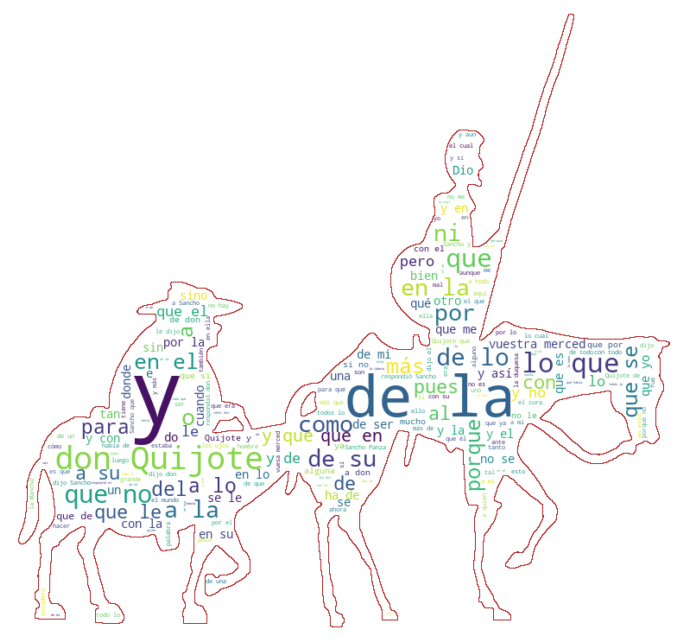

In [204]:
#define stop words to be excluded from the word cloud
#stopwords = set(STOPWORDS)
#stopwords.update(["y", "el", "él", "le", "la", "en", "de","ni"
#                  ,"o","que","por","lo","su","los","con","se","e","las","del","ya"])
stopwords = [".",",",";",":","—","-","¿","?","¡","!"]

# Using an image define a mask for the word cloud
donquijote_mask = np.array(Image.open("./hw4_2_quijote/don_quijote_2.png"))

# Generate a word cloud image
wc = WordCloud(stopwords=stopwords, background_color="white",
               max_words=200,
               mask = donquijote_mask,
              contour_width=1,
              contour_color='firebrick').generate(raw)

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Analysis of unique words

#### A numerical breakdown of the wordcounts:

In [205]:
print(f"There are {len(tokens)} words in Don Quijote, and {len(wordcounts)} unique words.")

There are 444359 words in Don Quijote, and 22826 unique words.


#### Calculate he smallest number of unique words that account for half of the total words

In [215]:
def getToX(countlist, X):
    total = 0
    numItems = 0
    gener = (tup for tup in countlist)
    while total < X:
        item = next(gener)
        numItems += 1
        total += item[1] # since we're using tuples of (word, count)
    return numItems

print()
print()
print(f"""The smallest number of unique words that account for half of the total words is 
      {getToX(wordcounts.most_common(200), len(tokens) / 2)}""")

print()



The smallest number of unique words that account for half of the total words is 
      127



### Determine if observed relative frequency of these words follow Zipf’s law for the **Don Quijote** text

#### - Isolate the ordered counts
#### - Plot Word Count Time Rank of Most Common 200 Words
#### - Plot Zipf's Law Distribution

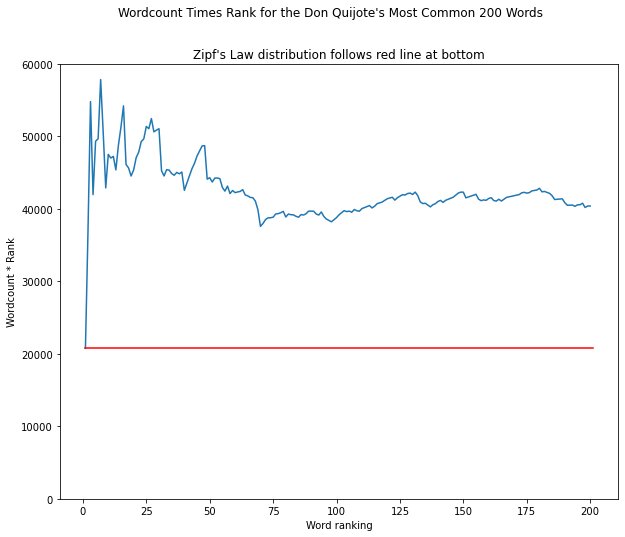

In [223]:
# isolate the ordered counts
counts = list(zip(*wordcounts.most_common(200)))[1]

plt.figure(figsize = (10, 8))
plt.plot(range(1,201), [(rank+1) * count for rank, count in enumerate(counts)])
plt.plot((1,201),(counts[0],counts[0]), color='r')
plt.suptitle("Wordcount Times Rank for the Don Quijote's Most Common 200 Words")
plt.title("Zipf's Law distribution follows red line at bottom")
plt.xlabel('Word ranking')
plt.ylabel('Wordcount * Rank')
plt.ylim(0,6e4);

Zipf's Law doesn't fit this Spanish corpus from over 400 years ago, comprised of two books published 12 years apart, and often considered the first modern novel.  Part of the reason is that, as the analysis above stands, different forms of a single lemma are not combined in their counts.  For example, the articles "el", "la", "los", and "las" combined would have the highest wordcount, as "the" does in English.  And other words combine with those articles further down the list, for example "del" is a contraction of "de" and "el", yet counts toward neither one's wordcount above.  At the same time, "la", "los", and "las" can be used as pronouns meaning "it"/"her" or "them", so you need to dig pretty deep into the grammar to lemmatize and count everything fairly.

Fortunately, that's exactly the type of task the Real Academia Española lives for and has been tackling for the last 14 years.  So far they've analyzed 316,000 documents of all sorts, both written and transcribed from oral recordings, across the Spanish-speaking world, and all from this century.  The 333 million words in the corpus contain 93 million from fiction (novels, stories, screenplays, plays) and 238 million from non-fiction (periodicals of all sorts, blogs, books, interviews).  The Academy lemmatized the words and compiled the frequency counts on their website, which we can download.

### Analyze the distribution of the **Real Academia Española (RAE)'s lemmatized corpus**

Instead of using the Don Quijote corpus, let's analyze the distribution of this larger lemmatized corpus to see if it adheres closely to the Zipf's Law line.

#### Read in the lemmatized data

In [208]:
url = "https://apps2.rae.es/CORPES2/estad/1000_lemas.txt"
top1000 = request.urlopen(url)
top1000 = top1000.readlines()
len(top1000)

1002

#### Show some of the read data

In [209]:
top1000[:11]

[b'\xef\xbb\xbfLema     Clase   Frec.   Frec-   Frec.           \n',
 b'                gral.   norm.   norm. (sin signos ort.)\n',
 b'el\tT\t27019003\t83588.6\t96060.4\n',
 b',\tY\t18161940\t56187.5\t64571\n',
 b'de\tP\t17497204\t54131\t62207.6\n',
 b'.\tY\t12299865\t38052\t43729.6\n',
 b'y\tC\t8125486\t25137.8\t28888.5\n',
 b'en\tP\t7760858\t24009.7\t27592.1\n',
 b'uno\tQ\t5934736\t18360.3\t21099.7\n',
 b'a\tP\t5491231\t16988.2\t19522.9\n',
 b'que\tH\t4929865\t15251.5\t17527.1\n']

#### Remove the text's header and other unnecessary columns

In [210]:
# Remove header, decode, split on tabs, and keep only the word, POS, and count
top1000 = [line.decode('utf-8').split('\t')[:3] for line in top1000[2:]]
top1000[:11]

[['el', 'T', '27019003'],
 [',', 'Y', '18161940'],
 ['de', 'P', '17497204'],
 ['.', 'Y', '12299865'],
 ['y', 'C', '8125486'],
 ['en', 'P', '7760858'],
 ['uno', 'Q', '5934736'],
 ['a', 'P', '5491231'],
 ['que', 'H', '4929865'],
 ['ser', 'V', '4693557'],
 ['se', 'L', '4507615']]

#### Remove punction marks

In [230]:
# Remove punctuation
top1000 = [t for t in top1000 if str.isalpha(t[0])]
#top1000[:11]

#### Show some of the data after cleanup

In [232]:
top1000_df = pd.DataFrame(top1000, columns = ['Word', 'Part Of Speech(Clase)','Frequency'])
top1000_df.head(11)

,Word,Part Of Speech(Clase),Frequency
0,el,T,27019003
1,de,P,17497204
2,y,C,8125486
3,en,P,7760858
4,uno,Q,5934736
5,a,P,5491231
6,que,H,4929865
7,ser,V,4693557
8,se,L,4507615
9,que,C,3707937


#### Plot the distribution for the RAE's lemmatized data

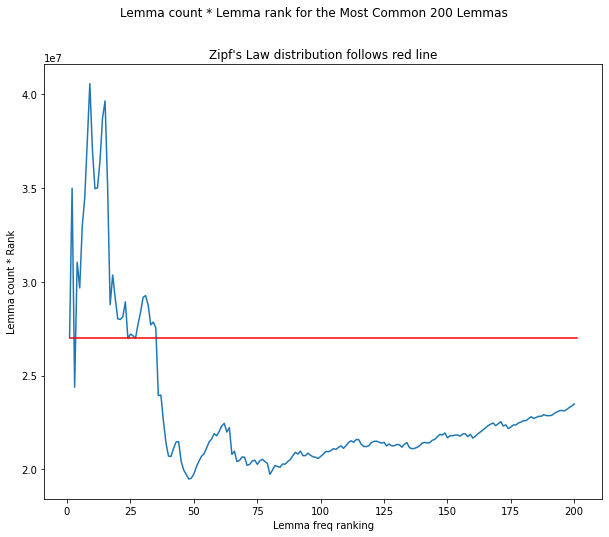

In [222]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,201), [(rank+1) * int(lemma[2]) for rank, lemma in enumerate(top1000[:200])])
plt.plot((1,201),(int(top1000[0][2]), int(top1000[0][2])), color='r')
plt.suptitle("Lemma count * Lemma rank for the Most Common 200 Lemmas")
plt.title("Zipf's Law distribution follows red line")
plt.xlabel('Lemma freq ranking')
plt.ylabel('Lemma count * Rank');

#### Show the 45-55 top words

In [233]:
top1000_df[45:55]

,Word,Part Of Speech(Clase),Frequency
45,ya,R,433894
46,sin,P,419557
47,dos,M,405831
48,saber,V,398477
49,te,L,394981
50,primero,M,394685
51,nos,L,392832
52,mismo,Q,390368
53,desde,P,385625
54,muy,R,384153


At first glance, **the distribution doesn't adhere too closely to the Zipf's Law line**, **but when you look at the y-axis scale, you see that the numbers are in a somewhat tight range**.  Spanish lemmas near the top 30 frequencies are more similar in count than English ones, and they drop off more quickly after that.

#### Same chart, but with larger y-scale:

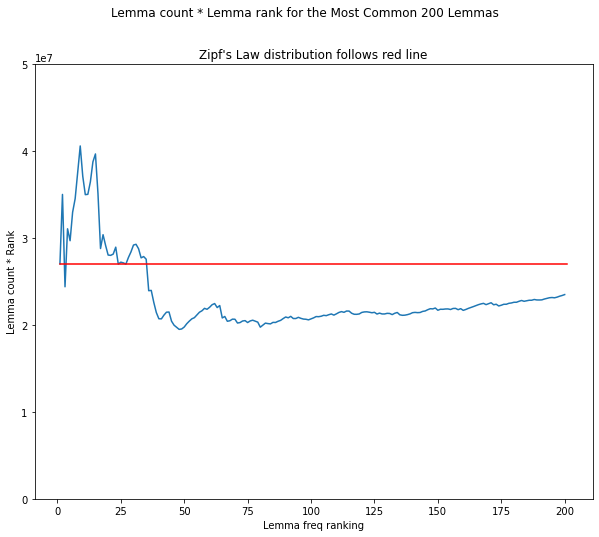

In [224]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,201), [(rank+1) * int(lemma[2]) for rank, lemma in enumerate(top1000[:200])])
plt.plot((1,201),(int(top1000[0][2]), int(top1000[0][2])), color='r')
plt.suptitle("Lemma count * Lemma rank for the Most Common 200 Lemmas")
plt.title("Zipf's Law distribution follows red line")
plt.xlabel('Lemma freq ranking')
plt.ylabel('Lemma count * Rank')
plt.ylim(0,5e7);